In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Problem A

In [ ]:
# A.1
A = np.array([[5, 1], [-2, -1]])
theta = np.random.uniform(0, 2*np.pi, 100)
V = np.zeros((100, 2))

for i in range(100):
  V[i][0] = np.cos(theta[i])
  V[i][1] = np.sin(theta[i])


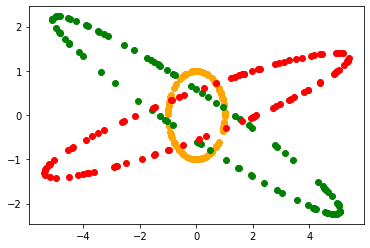

In [ ]:
# A.2
x = V[:,0] # cos
y = V[:,1] # sin

V1 = np.dot(V , A.T)
x1 = V1[:,0]
y1 = V1[:,1] 

V2 = np.dot(V , A)
x2 = V2[:,0]
y2 = V2[:,1] 

plt.scatter(x, y, c = 'orange')
plt.scatter(x1, y1, c = 'green')
plt.scatter(x2, y2, c = 'red')

plt.show()

By multiplying V with transpose A, we expand and rotate original V. Transpose and without transpose leads to directional differences in rotations. 

In [ ]:
# A.3
mag = lambda x, y : np.sqrt(x**2 + y**2)
magv = np.zeros(100)
magv1 = np.zeros(100)
for i in range(100):
  magv[i] = mag(V[i][0], V[i][1])
  magv1[i] = mag(V1[i][0], V1[i][1])

maxd = np.argmax(magv)
maxd1 = np.argmax(magv1)
mind = np.argmin(magv)
mind1 = np.argmin(magv1)
print("max and the min values of vmag: %f, %f" % (max(magv), min(magv)))
print("max [%f, %f]" %(V[maxd, 0], V[maxd, 1]))
print("min [%f, %f]" %(V[mind, 0], V[mind, 1]))
print("max and the min values of vmag1: %f, %f" % (max(magv1), min(magv1)))
print("max [%f, %f]" %(V1[maxd, 0], V1[maxd, 1]))
print("min [%f, %f]" %(V1[mind, 0], V1[mind, 1]))

max and the min values of vmag: 1.000000, 1.000000
max [0.968576, -0.248719]
min [-0.174689, 0.984624]
max and the min values of vmag1: 5.541367, 0.541477
max [4.594159, -1.688432]
min [0.111181, -0.635247]


In [ ]:
# A.4
w, v = np.linalg.eig(A)
print("numpylinalg eigenvalue [%f, %f]" % (w[0], w[1]))
print("with eigen vector ", (v[:, 0]), " and ", (v[:,1]), "respectively")

numpylinalg eigenvalue [4.645751, -0.645751]
with eigen vector  [ 0.94260289 -0.33391584]  and  [-0.17440959  0.98467319] respectively


In [ ]:
print("analytical: [%f, %f]" %(2 + np.sqrt(7), 2 - np.sqrt(7)))
#print("with eigen vector ", , " and ", , "respectively")

analytical: [4.645751, -0.645751]


Problem B

In [ ]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
# B.1
data = datasets.load_diabetes()
df = pd.DataFrame(data = data.data, columns = data.feature_names)
target = data.target
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


There are 10 features: age, sex, bmi (body mass index), bp (average blood pressure), s1-6 (state of the system). Target vairable is integer 25 -346.



In [ ]:
# B.2
X1 = np.array([df['age'].values, df['sex'].values, df['bmi'].values, df['bp'].values, df['s1'].values, df['s2'].values, df['s3'].values, df['s4'].values, df['s5'].values, df['s6'].values])

(10, 442)

In [ ]:
# B.3.a
col_means = X1.mean(axis = 0)
col_std = X1.std(axis = 0)
mean_center_X1 = X1 - col_means 
std_norm_X1 = (mean_center_X1)/ col_std

In [ ]:
# B.3.b
covariance = np.cov(std_norm_X1)
w, v = np.linalg.eig(covariance)
v = v.T

In [ ]:
# B.3.c
V = np.sort(w)[::-1]
order = []

for i in V:
  index = np.where(w == i)[0]
  order.append(index)

E = v[:,order]
E = E[:,:,0]

Need 7 vectors for at least 90% coverage


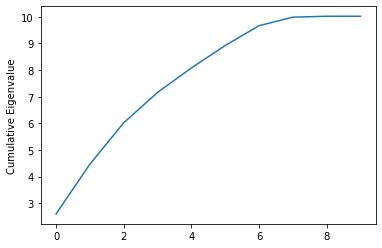

In [ ]:
# B.3.d
V_cusum = np.cumsum(V)
plt.plot(V_cusum)
plt.ylabel("Cumulative Eigenvalue")
# want 90% variance explained with 10 variables => 0.9 = sum(lambda)/ 10 => sum(lambda) = 9
m = 0
for i in range(10):
  if V_cusum[i] >= 9:
    print("Need %d vectors for at least 90%% coverage" %(i+1))
    m = i+1
    break
plt.show()

In [ ]:
# B.3.e
E1 = E[:, :m]
P = np.dot(X1.T, E1)

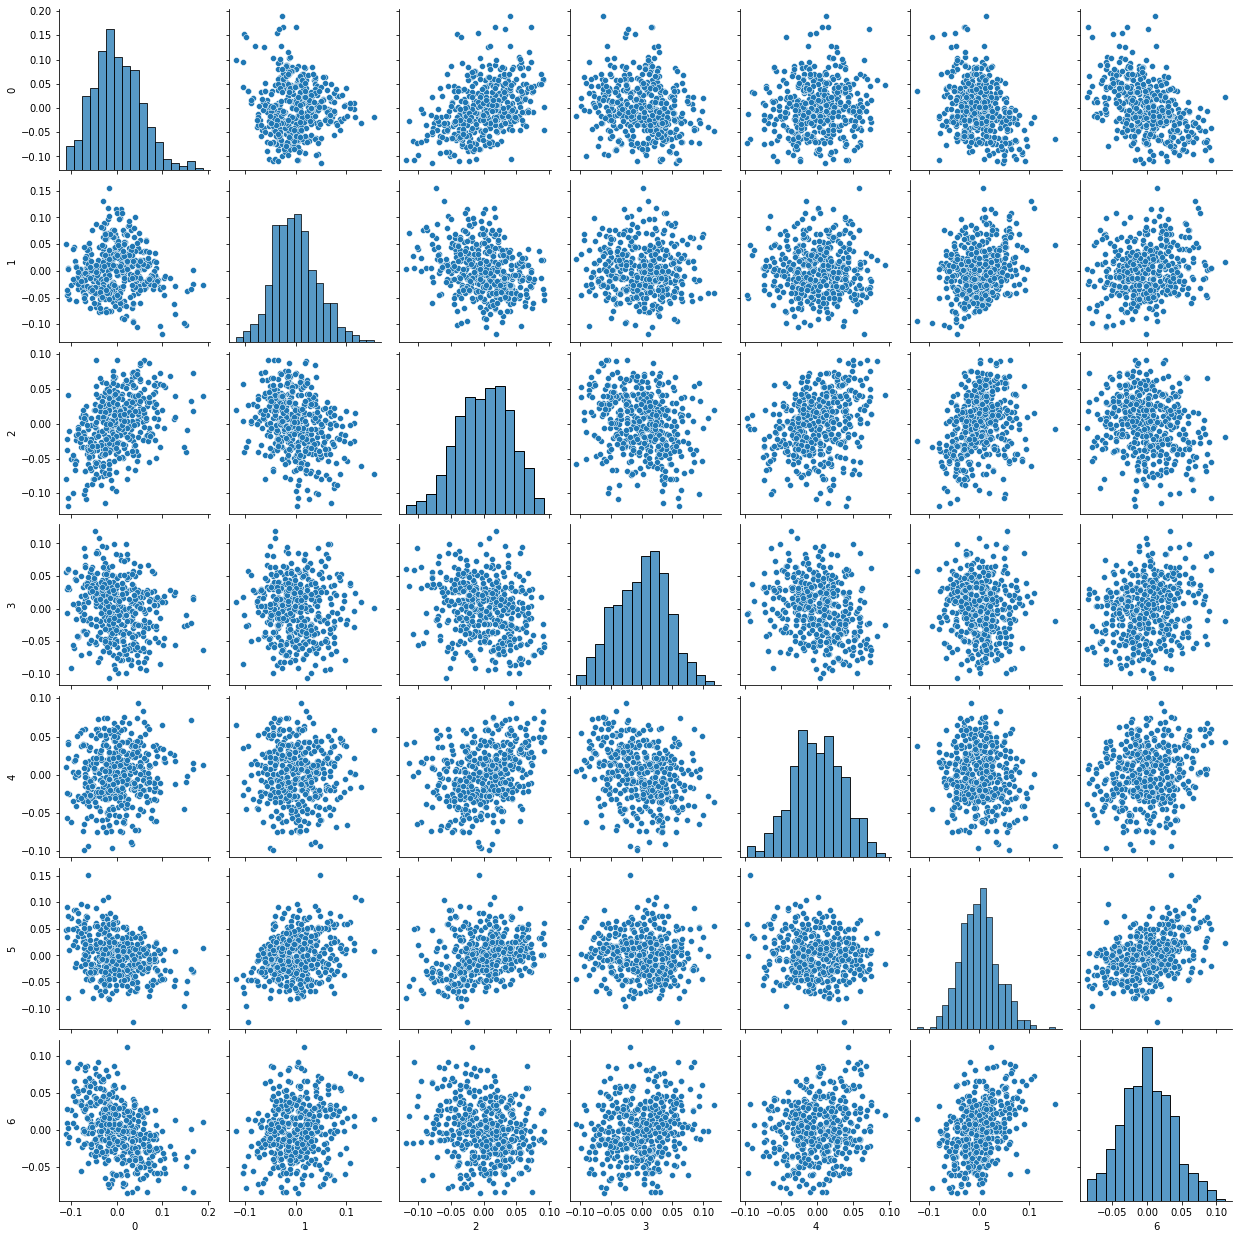

In [ ]:
# B.3.f
sns.pairplot(pd.DataFrame(P))

Need 7 vectors


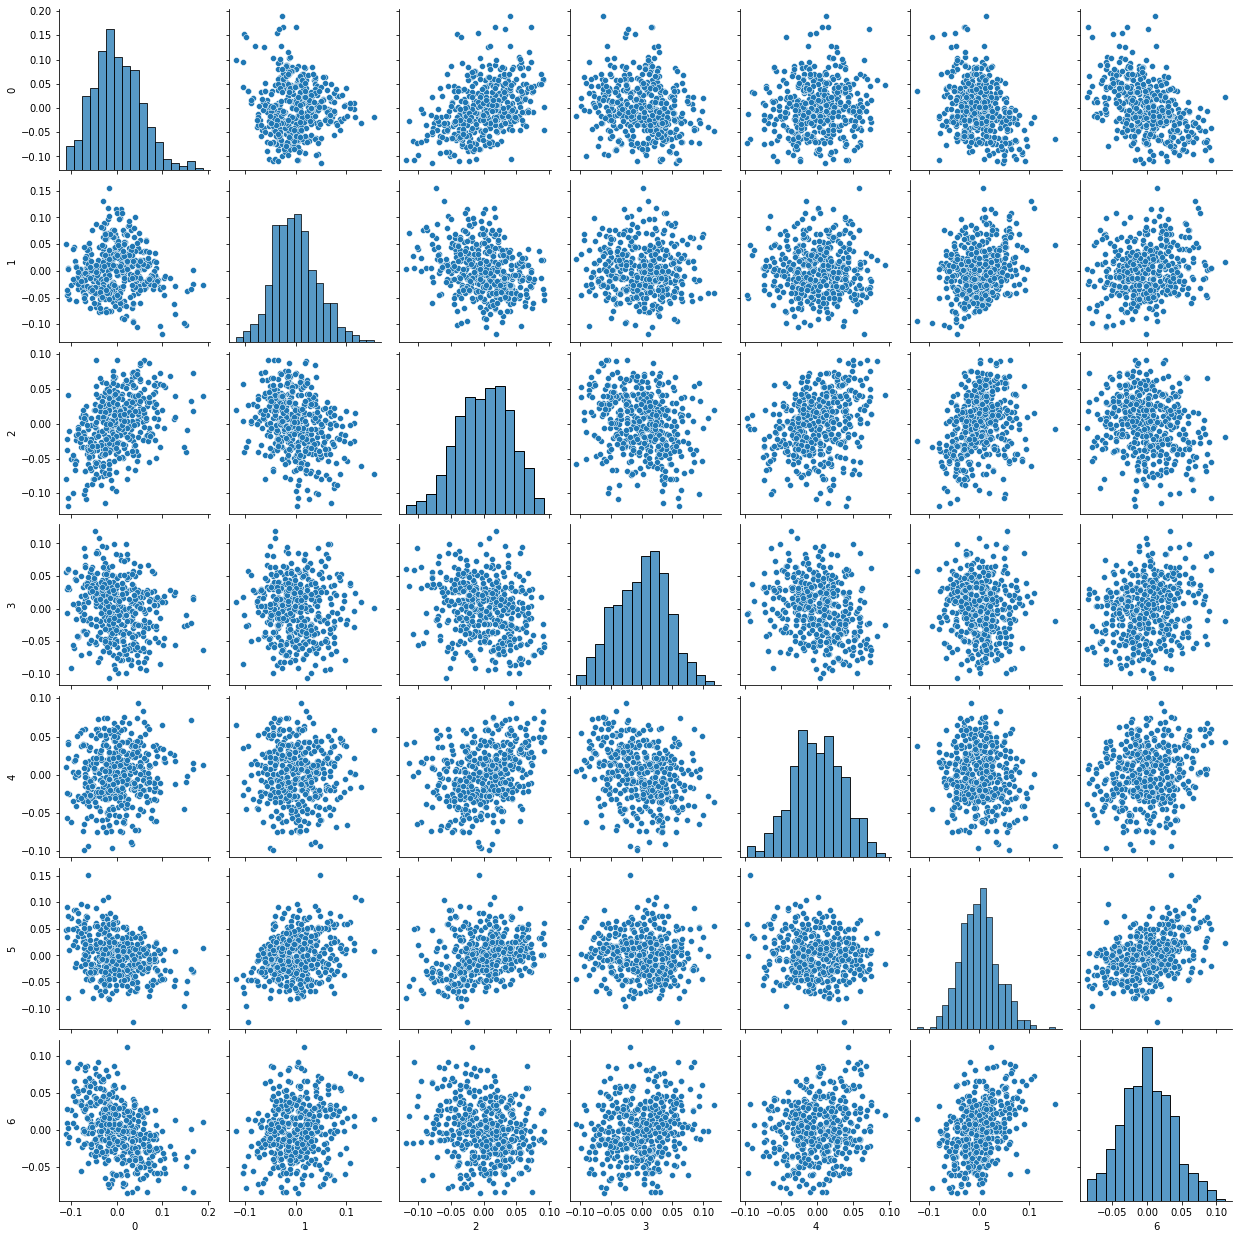

In [ ]:
# B.4
pca = PCA()
pca.fit(X1)
evr_cum = np.cumsum(pca.explained_variance_ratio_)
m = 0
for i in evr_cum:
  if i > 0.9:
    break
  m += 1
print("Need %d vectors" %(m+1))
E1 = E[:, :m+1]
P = np.dot(X1.T, E1)
sns.pairplot(pd.DataFrame(P))